In [1]:
# from https://stackoverflow.com/questions/8230638/parallel-coordinates-plot-in-matplotlib

In [2]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np


# # create some dummy data
# ynames = ['P1', 'P2', 'P3', 'P4', 'P5']
# N1, N2, N3 = 10, 5, 8
# N = N1 + N2 + N3
# category = np.concatenate([np.full(N1, 1), np.full(N2, 2), np.full(N3, 3)])
# y1 = np.random.uniform(0, 10, N) + 7 * category
# y2 = np.sin(np.random.uniform(0, np.pi, N)) ** category
# y3 = np.random.binomial(300, 1 - category / 10, N)
# y4 = np.random.binomial(200, (category / 6) ** 1/3, N)
# y5 = np.random.uniform(0, 800, N)

# # organize the data
# ys = np.dstack([y1, y2, y3, y4, y5])[0]

In [3]:
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])
    
def parallel_plot(data, labels, host, inverts=False, use_curves=True, category=False, **plot_kwargs):
    if not inverts:
        inverts = [False]*len(labels)
    if not category:
        category = range(data.shape[0])
    
    ys = data
    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0] #left most column is unchanged
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0] # rescale following columns

    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
            if inverts[i]:
                ax.invert_yaxis()
                zs[:,i] = _invert(zs[:,i], (ymins[0], ymaxs[0]))
                
    host.set_xlim(0, ys.shape[1] - 1)
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(labels, fontsize=14)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    host.set_title('Parallel Coordinates Plot', fontsize=18)

    
    colors = plt.cm.tab10.colors
    for j in range(len(category)):
        if use_curves:
            # create bezier curves
            verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                             np.repeat(zs[j, :], 3)[1:-1]))
            # for x,y in verts: host.plot(x, y, 'go') # to show the control points of the beziers
            codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
            path = Path(verts, codes)
            patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=colors[j - 1])
            host.add_patch(patch)
        else:
            # to just draw straight lines between the axes:
            host.plot(range(ys.shape[1]), zs[j,:], c=colors[j % len(colors) ], label=category[j])
#     fig.tight_layout()

    return zs


In [4]:
# fig, host = plt.subplots()

# zs = parallel_plot(ys, ynames, host, inverts=[0,0,1,0,0], use_curves=False)


In [5]:


import pickle
import numpy as np
import matplotlib.pyplot as plt

# from radar_plot import ComplexRadar 

low_balanced = [11, 11]
low_unbalanced = [11, 6]

medium_balanced = [22, 22]
medium_unbalanced = [22, 11]

high_balanced = [32, 32]
high_unbalanced = [32, 16]


traffic_conditions = [medium_unbalanced, low_unbalanced]#, medium_balanced, medium_unbalanced, high_balanced, high_unbalanced]

pref_types = ['speed', 'stops', 'wait']

vote_speed = [1.0, 0.0, 0.0]
vote_stops = [0.0, 1.0, 0.0]
vote_wait = [0.0, 0.0, 1.0]

vote_uniform_1 = [0.5, 0.5, 0.0]
vote_uniform_2 = [0.5, 0.0, 0.5]
vote_uniform_3 = [0.0, 0.5, 0.5]

vote_quarter_1 = [0.75, 0.25, 0.0]
vote_quarter_2 = [0.75, 0.0, 0.25]
vote_quarter_3 = [0.25, 0.0, 0.75]
vote_quarter_4 = [0.0, 0.25, 0.75]
vote_quarter_5 = [0.25, 0.75, 0.0]
vote_quarter_6 = [0.0, 0.75, 0.25]

vote_types = [vote_speed, vote_stops, vote_wait, vote_uniform_1, vote_uniform_2, vote_uniform_3, vote_quarter_1, vote_quarter_2, vote_quarter_3, vote_quarter_4, vote_quarter_5, vote_quarter_6]

# vote_types = [vote_uniform_1, vote_uniform_2, vote_uniform_3]
# vote_types = [vote_stops, vote_wait, vote_uniform_3]

categories = ['Speed', 'Number of Stops', 'Wait Time']
categories = [*categories, categories[0]]



## Radar plots

In [6]:
# data = []
# names = []
# fig1, ax = plt.subplots(1,2, subplot_kw={'projection': 'polar'})
# ax = ax.flatten()
# for pp, traffic in enumerate(traffic_conditions):
#     for vote in vote_types:

#         path = f"runs/{traffic[0]}_{traffic[1]}_{vote[0]}_{vote[1]}_{vote[2]}"

#         speeds_path = path + "/veh_speed_hist.pickle"
#         stops_path = path + "/veh_stops.pickle"
#         wait_path = path + "/veh_wait_time.pickle"

#         with open(speeds_path, "rb") as f:
#             speeds = pickle.load(f)
            
#         avg_speed = np.mean([np.mean(speeds[x]) for x in speeds.keys()])
#         var_speed = np.var(([np.mean(speeds[x]) for x in speeds.keys()]))
# #         print("speed: ", avg_speed, var_speed)

#         with open(stops_path, "rb") as f:
#             stops = pickle.load(f)

#         avg_stops = np.mean([np.mean(stops[x]) for x in stops.keys()])
#         var_stops = np.var(([np.mean(stops[x]) for x in stops.keys()]))
# #         print("stops: ", avg_stops, var_stops)

#         with open(wait_path, "rb") as f:
#             wait = pickle.load(f)

#         wait = {k:v if v else [0] for k,v in wait.items()}

#         avg_wait = np.mean([np.mean(wait[x]) for x in wait.keys()])
#         var_wait = np.var(([np.mean(wait[x]) for x in wait.keys()]))
# #         print("wait: ", avg_wait, var_wait)


#         result = [avg_speed, avg_stops, avg_wait]
# #         result = [*result, result[0]]
#         data.append(result)
#         names.append(f"{vote[0]}_{vote[1]}_{vote[2]}")


#     variables = ('Speed', 'Number of Stops', 'Wait Time')

# #     fig, host = plt.subplots()
# #     parallel_plot(np.array(data), variables, host, inverts=[0,1,1], category=names, use_curves=False)
    
#     ranges = [(0, max([x[0] for x in data])), (max([x[1] for x in data]), 0), (max([x[2] for x in data]), 0)]            
#     # plotting
#     radar = ComplexRadar(ax[pp], variables, ranges)
    
#     for d, name in zip(data, names):
#         radar.plot(d, label=name)
#         radar.fill(d, alpha=0.2)
#     fig1.legend()
# #     plt.show()

#     fig.legend()


# Value alignment

In [7]:
import pandas as pd


import pickle
import numpy as np
import matplotlib.pyplot as plt


low_balanced = [11, 11]
low_unbalanced = [11, 6]

medium_balanced = [22, 22]
medium_unbalanced = [22, 11]

high_balanced = [32, 32]
high_unbalanced = [32, 16]



traffic_dict = {('low', 'balanced'): [11,11],
                      ('low', 'unbalanced'): [11,6],
                      ('medium', 'balanced'): [22,22],
                      ('medium', 'unbalanced'): [22,11],
                      ('high', 'balanced'): [32,32],
                      ('high', 'unbalanced'): [32,16],
                     }


traffic_conditions = [medium_unbalanced, medium_balanced]#, medium_unbalanced, high_balanced, high_unbalanced]
# traffic_conditions = [medium_balanced]#, medium_unbalanced, high_balanced, high_unbalanced]

pref_types = ['speed', 'stops', 'wait']

vote_speed = [1.0, 0.0, 0.0]
vote_stops = [0.0, 1.0, 0.0]
vote_wait = [0.0, 0.0, 1.0]

vote_uniform_1 = [0.5, 0.5, 0.0]
vote_uniform_2 = [0.5, 0.0, 0.5]
vote_uniform_3 = [0.0, 0.5, 0.5]

vote_quarter_1 = [0.75, 0.25, 0.0]
vote_quarter_2 = [0.75, 0.0, 0.25]
vote_quarter_3 = [0.25, 0.0, 0.75]
vote_quarter_4 = [0.0, 0.25, 0.75]
vote_quarter_5 = [0.25, 0.75, 0.0]
vote_quarter_6 = [0.0, 0.75, 0.25]

vote_types = [vote_speed, vote_stops, vote_wait, vote_uniform_1, vote_uniform_2, vote_uniform_3, vote_quarter_1, vote_quarter_2, vote_quarter_3, vote_quarter_4, vote_quarter_5, vote_quarter_6]

# vote_types = [vote_uniform_1, vote_uniform_2, vote_uniform_3]
vote_types = [vote_stops, vote_wait, vote_uniform_3]

categories = ['Speed', 'Number of Stops', 'Wait Time']
categories = [*categories, categories[0]]

data = []
names = []

for traffic in traffic_conditions:
    for vote in vote_types:

        try:
            path = f"proportional_100/{traffic[0]}_{traffic[1]}_{vote[0]}_{vote[1]}_{vote[2]}"
            alignment_path = path + "/obj_alignment.pickle"
            with open(alignment_path, "rb") as f:
                alignment = pickle.load(f)
        except:
            path = f"runs/{traffic[0]}_{traffic[1]}_{vote[0]}_{vote[1]}_{vote[2]}"
            alignment_path = path + "/obj_alignment.pickle"
            with open(alignment_path, "rb") as f:
                alignment = pickle.load(f)

        align_df = pd.DataFrame(alignment)
        align = align_df.iloc[:,:3].sub(align_df['reference'], axis=0).abs()
        num = (1-align).sum(axis=0)
        assert max(num)<=align.shape[0]
        fractions = (1-align).sum(axis=0)/align.shape[0]
        temp = fractions.to_dict()
        temp.update({'vote': vote, 'traffic': traffic})
        data.append(temp)
        


In [8]:
# align_df
# !pwd

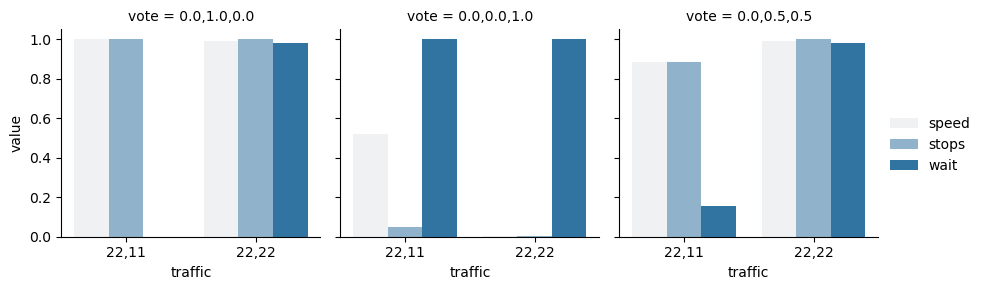

In [9]:
import seaborn as sns

df = pd.DataFrame(data)
df = df.melt(id_vars=['vote','traffic'],value_vars=['speed','wait','stops'], var_name='preference')
df['traffic'] = [','.join(map(str, l)) for l in df['traffic']]
df['vote'] = [','.join(map(str, l)) for l in df['vote']]


g = sns.FacetGrid(df, col="vote")
g.map_dataframe(sns.barplot, x='traffic',y='value', hue='preference', hue_order=['speed','stops','wait'])
g.add_legend()

In [10]:
# from scipy.stats import chisquare,chi2_contingency

# obs = pd.crosstab(df.reference.values, df.iloc[:,1],colnames=['wait'])#, rownames=['a'], colnames=['b', 'c'])
# res = chi2_contingency(obs, correction=False)


## Heatmap version

In [11]:
import itertools
import glob
import os

data = []

columns = ['stops','wait', 'reference']


traffic_conditions = [medium_balanced, medium_unbalanced, high_balanced, high_unbalanced]
vote_types = [vote_uniform_3]



correlate = lambda x,y: (x==y).sum()/len(x)
for (volume, balance_type), traffic in traffic_dict.items():
    for vote in vote_types:

        _path = f"proportional_100/{traffic[0]}_{traffic[1]}_{vote[0]}_{vote[1]}_{vote[2]}"
        if not os.path.isdir(_path):
            print('getting runs', _path)
            _path = f"runs/{traffic[0]}_{traffic[1]}_{vote[0]}_{vote[1]}_{vote[2]}"
        else:
            print(len(glob.glob(f'{_path}*')))
        for trial, path in enumerate(glob.glob(f'{_path}*')):
            
            alignment_path = path + "/obj_alignment.pickle"
            with open(alignment_path, "rb") as f:
                alignment = pickle.load(f)


            align_df = pd.DataFrame(alignment)
            _data = align_df[columns].corr(method=correlate).stack().reset_index()
            _data['vote'] = ','.join(map(str, vote))
            _data['volume'] = volume
            _data['balance'] = balance_type
            _data['trial'] = trial
            data.append(_data)
        
newdf = pd.concat(data).reset_index(drop=True)
        

100
100
100
100
100
100


In [12]:
# import glob
# glob.glob(path)
# # path
newdf

,level_0,level_1,0,vote,volume,balance,trial
0,stops,stops,1.000000,"0.0,0.5,0.5",low,balanced,0
1,stops,wait,0.425000,"0.0,0.5,0.5",low,balanced,0
2,stops,reference,0.833333,"0.0,0.5,0.5",low,balanced,0
3,wait,stops,0.425000,"0.0,0.5,0.5",low,balanced,0
4,wait,wait,1.000000,"0.0,0.5,0.5",low,balanced,0
...,...,...,...,...,...,...,...
5395,wait,wait,1.000000,"0.0,0.5,0.5",high,unbalanced,99
5396,wait,reference,0.186111,"0.0,0.5,0.5",high,unbalanced,99
5397,reference,stops,0.838889,"0.0,0.5,0.5",high,unbalanced,99
5398,reference,wait,0.186111,"0.0,0.5,0.5",high,unbalanced,99


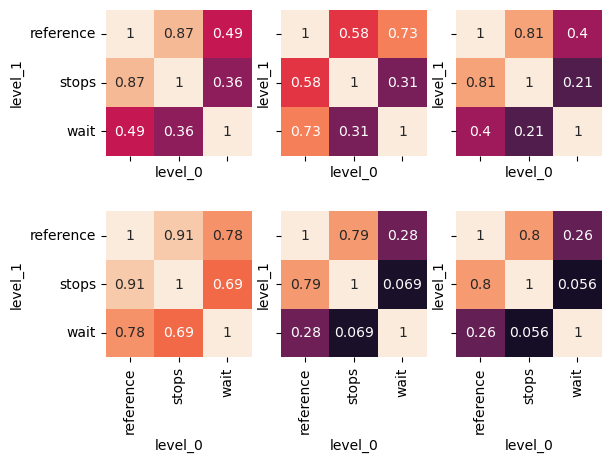

In [15]:
ncols = newdf.volume.unique().size
nrows = newdf.balance.unique().size

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True)

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = pd.pivot_table(data, index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)

args = ['level_0', 'level_1', 0]
grouping = newdf.groupby(['volume', 'balance'])
for i, vol in enumerate(newdf.volume.unique()):
    for j, bal in enumerate(newdf.balance.unique()):
        
        group_data = grouping.get_group((vol, bal))
        draw_heatmap('level_0', 'level_1', 0, data=group_data, ax=axes[j,i], cbar=False,# cbar_ax=cbar_ax,
                 square=True, cbar_kws={'label': 'fraction of same argmax'}, annot=True, vmin=0, vmax=1)
#         d = pd.pivot_table(group_data, index=args[1], columns=args[0], values=args[2])
#         sns.heatmap(d, **kwargs)

In [16]:
newdf

,level_0,level_1,0,vote,volume,balance,trial
0,stops,stops,1.000000,"0.0,0.5,0.5",low,balanced,0
1,stops,wait,0.425000,"0.0,0.5,0.5",low,balanced,0
2,stops,reference,0.833333,"0.0,0.5,0.5",low,balanced,0
3,wait,stops,0.425000,"0.0,0.5,0.5",low,balanced,0
4,wait,wait,1.000000,"0.0,0.5,0.5",low,balanced,0
...,...,...,...,...,...,...,...
5395,wait,wait,1.000000,"0.0,0.5,0.5",high,unbalanced,99
5396,wait,reference,0.186111,"0.0,0.5,0.5",high,unbalanced,99
5397,reference,stops,0.838889,"0.0,0.5,0.5",high,unbalanced,99
5398,reference,wait,0.186111,"0.0,0.5,0.5",high,unbalanced,99


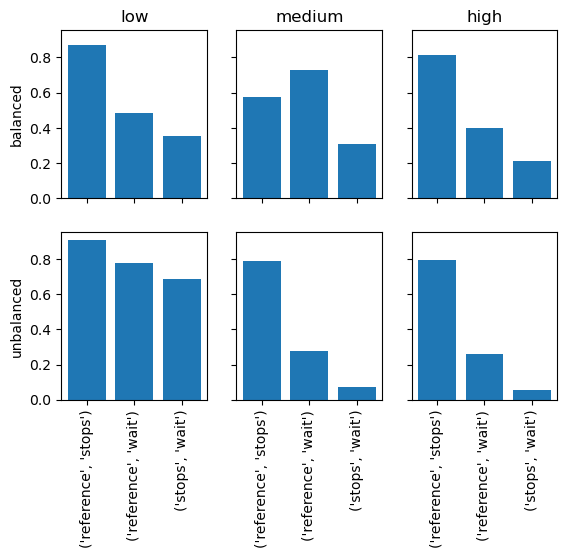

In [17]:
fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True)

def draw_barplot(*args, **kwargs):
    data = kwargs.pop('data')
    ax = kwargs.pop('ax')
    d = pd.pivot_table(data, index=args[1], columns=args[0], values=args[2])
    labels = []
    vals = []
    for i, j in itertools.combinations(d.columns, 2):
        vals.append(d.loc[i,j])
        labels.append((i,j))
    print(d.head())
    ax.bar()

args = ['level_0', 'level_1', 0]
grouping = newdf.groupby(['volume', 'balance'])

# g = sns.FacetGrid(newdf, row="volume")
# g.map_dataframe(sns.barplot, x='balance',y=0, hue=['level_0','level_1'])
# g.add_legend()

for i, vol in enumerate(newdf.volume.unique()):
    for j, bal in enumerate(newdf.balance.unique()):
        
        group_data = grouping.get_group((vol, bal))
        d = pd.pivot_table(group_data, index=args[1], columns=args[0], values=args[2])
        labels = []
        vals = []
        for a, b in itertools.combinations(d.columns, 2):
            vals.append(d.loc[a,b])
            labels.append((a,b))        
        axes[j,i].bar(range(len(labels)), vals)
        axes[j,i].set_xticks(range(3))
        axes[j,i].set_xticklabels(labels, rotation=90)
        
        if j==0:
            axes[j,i].set_title(vol)
        if i==0:
            axes[j,i].set_ylabel(bal)
#         draw_barplot('level_0', 'level_1', 0, data=group_data, ax=axes[j,i], )
# #         d = pd.pivot_table(group_data, index=args[1], columns=args[0], values=args[2])
# #         sns.heatmap(d, **kwargs)

In [18]:
ax.bar?

Object `ax.bar` not found.


In [19]:
[i for i in itertools.combinations([1,2,3],2)]

[(1, 2), (1, 3), (2, 3)]

In [20]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Generate a set of sample data
np.random.seed(0)
indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
     names=('label0', 'label1', 'label2'))
data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
     index=indices, columns=('value',)).reset_index()

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = pd.pivot_table(data, index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)


fg = sns.FacetGrid(newdf, row='traffic', col='vote')
cbar_ax = fg.fig.add_axes([0.92, .1, .03, 0.85])


fg.map_dataframe(draw_heatmap, 'level_0', 'level_1', 0, cbar=True, cbar_ax=cbar_ax,
                 square=True, cbar_kws={'label': 'fraction of same argmax'}, annot=True, vmin=0, vmax=1,)
for ax in fg.axes.flat:
    # set aspect of all axis
    ax.set_aspect('equal','box')
    # set background color of axis instance
fg.fig.subplots_adjust(right=.9)

# fg.add_legend()



# cbar_ax = fg.fig.add_axes([.91, .15, .03, .7])
# g = fg.map_dataframe(draw_heatmap, 'col_col', 'index_col', 'val_col', annot=True, 
#                     cmap='Spectral', cbar_ax=cbar_ax, cbar_kws={'label': 'color_bar_label'})

KeyError: 'traffic'

In [ ]:
fg.fig.axes[0].get_position()

In [ ]:
f = fg.fig

In [ ]:
data.pivot?

In [ ]:
pd.pivot_table?